In [51]:
# Блок 1: Импорт библиотек и загрузка данных
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Загрузка датасета
dataset_path = 'drug200.csv'
dataset = pd.read_csv(dataset_path)
df = dataset.copy()
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [53]:
# Блок 2: Проверка уникальных значений в столбце 'Drug'
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [54]:
# Блок 3: Преобразование категориальных переменных в целочисленные значения

df.Sex = df.Sex.replace(['F', 'M'], [0, 1])
df.BP = df.BP.replace(['LOW', 'NORMAL', 'HIGH'], [0, 1, 2])
df.Cholesterol = df.Cholesterol.replace(['NORMAL', 'HIGH'], [1, 2])
df.Drug = df.Drug.replace(['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'],
                          [0, 1, 2, 3, 4])
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,2
196,16,1,0,2,12.006,2
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


In [55]:
# Блок 4: Обучение модели дерева решений с использованием всех признаков

feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [56]:
# Блок 5: Оценка точности классификации модели дерева решений

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9666666666666667
R2: 0.9780179520058618
MSE: 0.03333333333333333


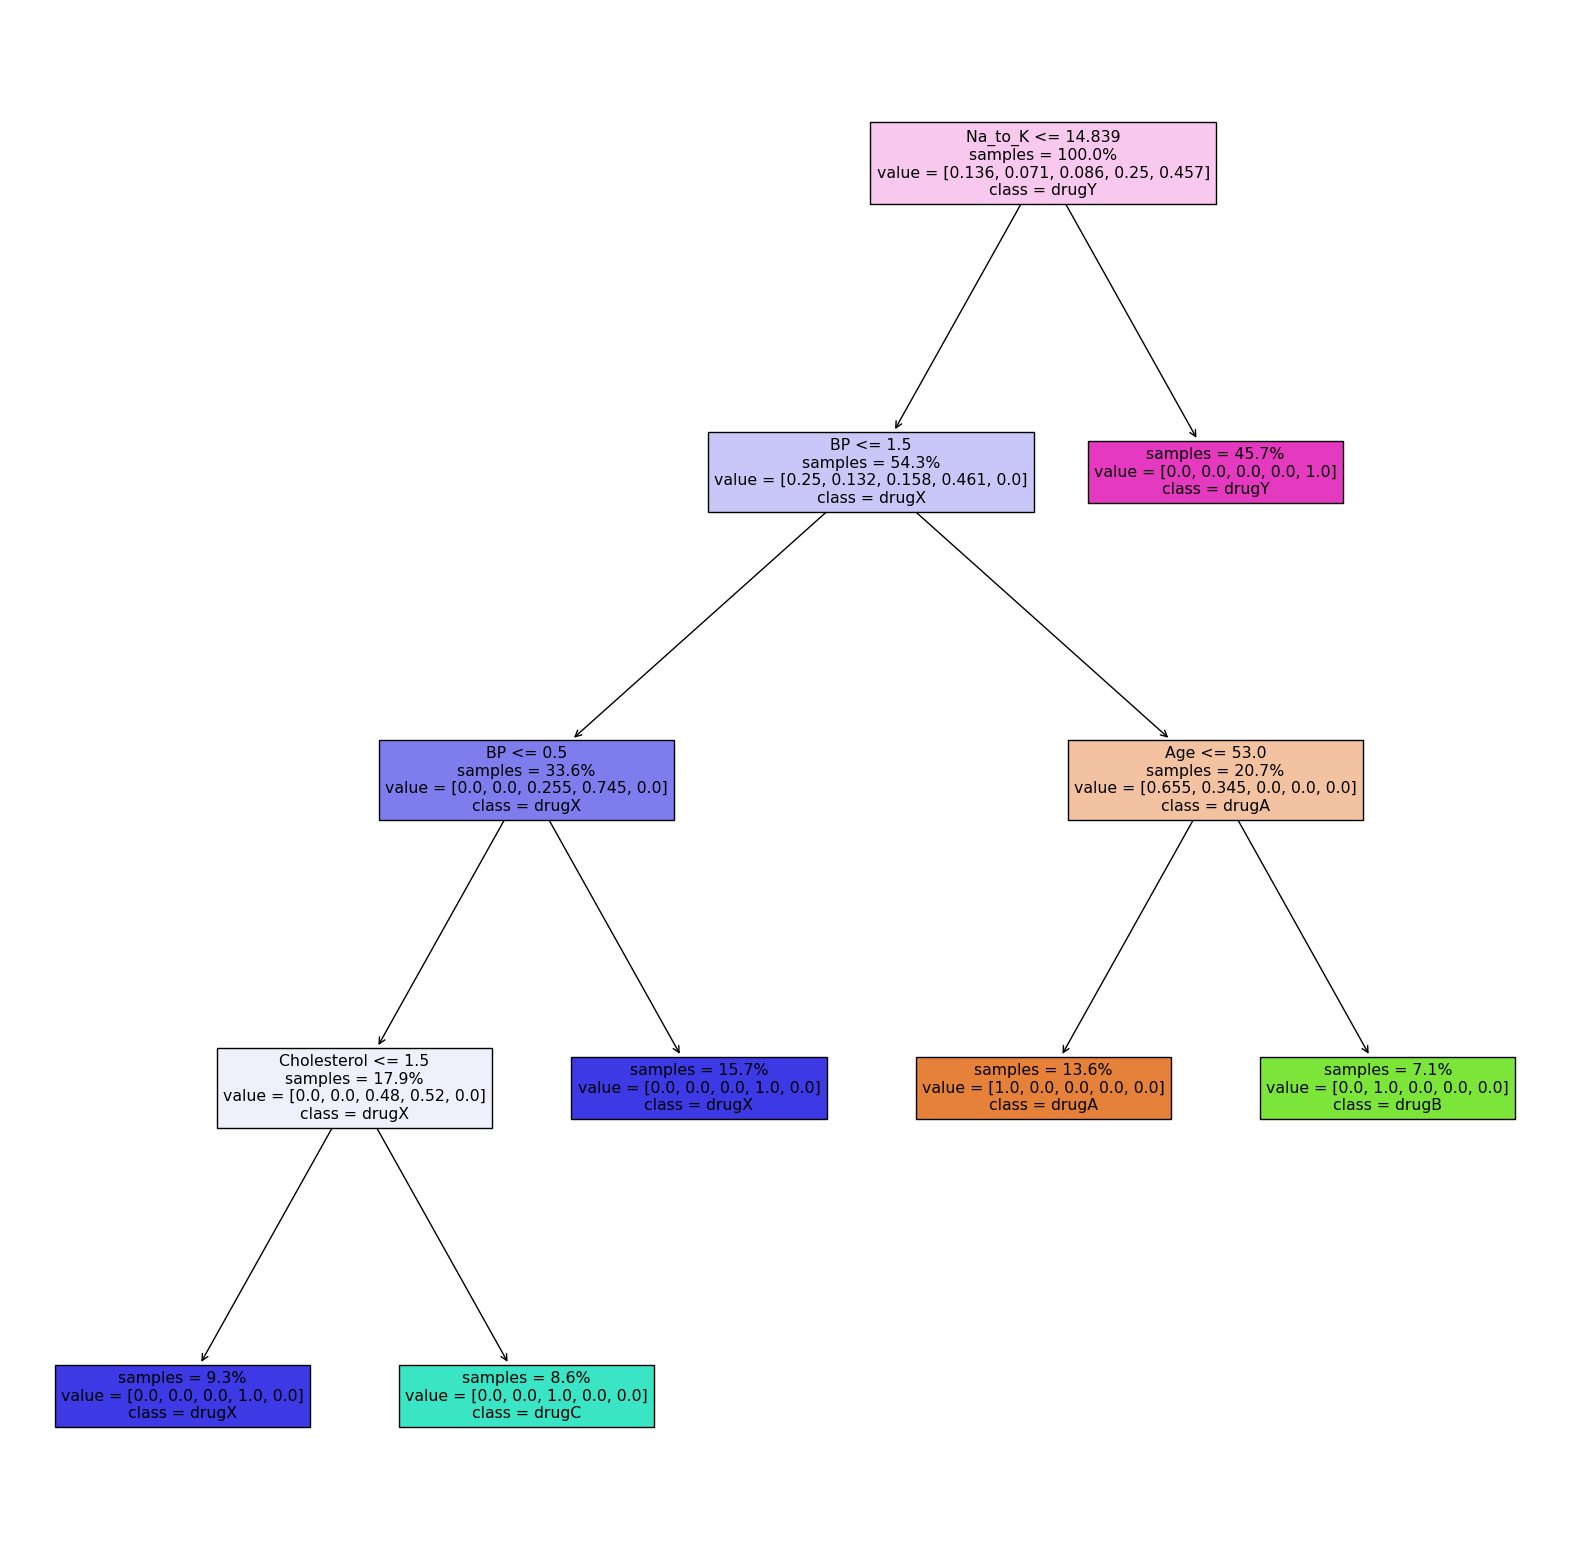

In [57]:
# Блок 6: Визуализация дерева решений

fig = plt.figure(figsize=(20, 20))
plot_tree(dtree, feature_names=df.columns,
          class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
          impurity=False, proportion=True, filled=True)
fig.savefig('dtree.png')

In [58]:
# Блок 7: Замена строковых значений в столбце 'Drug' на целые числа для построения тепловой карты

df.Drug = df.Drug.replace(['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'],
                          [0, 1, 2, 3, 4])
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,2
196,16,1,0,2,12.006,2
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


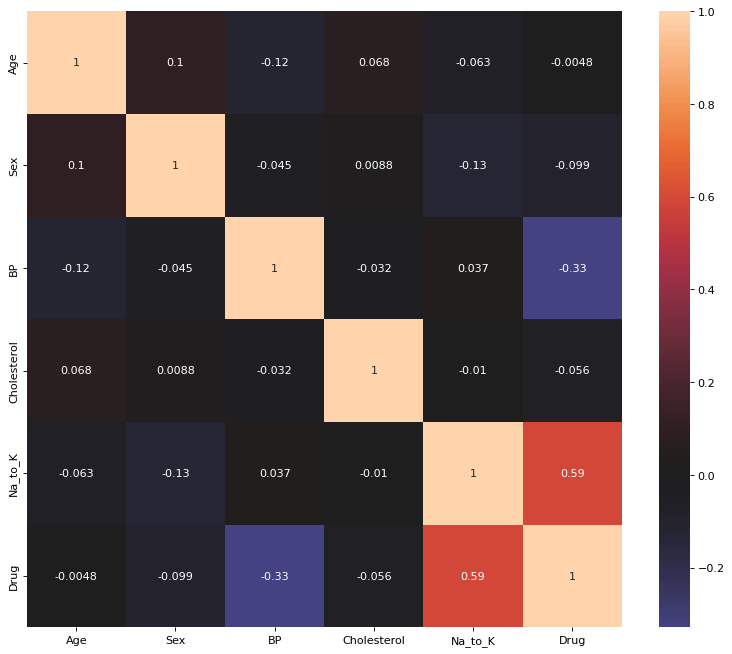

In [59]:
# Блок 8: Анализ корреляции признаков с использованием тепловой карты

plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.loc[:, 'Age':'Drug'].corr(), xticklabels=df.loc[:, 'Age':'Drug'].corr().columns, center=0, annot=True)
plt.show()

In [60]:
# Блок 9: Модель без 'Age' параметра

feature_cols = ['Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9
R2: 0.9340538560175856
MSE: 0.1


In [61]:
# Блок 10: Модель без 'Cholesterol' параметра

feature_cols = ['Age', 'Sex', 'BP', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9333333333333333
R2: 0.9560359040117238
MSE: 0.06666666666666667


In [62]:
# Блок 11: Модель без 'Sex' параметра

feature_cols = ['Age', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.9666666666666667
R2: 0.9780179520058618
MSE: 0.03333333333333333


In [63]:
# Блок 12: Модель без 'BP' параметра

feature_cols = ['Age', 'Sex', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.6
R2: -0.26396775966294195
MSE: 1.9166666666666667


In [64]:
# Блок 13: Модель без 'Na_to_K' параметра

feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol']
X = df[feature_cols]
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy: 0.4666666666666667
R2: -0.9893753434694998
MSE: 3.0166666666666666
